In [2]:
# Reading files
import os
import json

# Data cleaning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import time

# Preprocessing
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer  # remove punctuation
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.casual import TweetTokenizer

from sklearn.feature_extraction.text import CountVectorizer  # to create document-term matrices from X_train and X_test

# Feature engineering
from nltk.sentiment import SentimentIntensityAnalyzer

# Model utility
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split

# Modelling
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.multiclass import OneVsRestClassifier

# Model evaluation
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
df = pd.read_excel('../data/full_clean_df.xlsx', encoding="latin1", index_col=0)

In [8]:
x = 'tweets_train'  # important not to make this a list
y = ['NotHate', 'Racist', 'Sexist', 'Homophobe', 'Religion','OtherHate']

X_train, X_test, y_train, y_test = train_test_split(df[x], df[y], test_size = 0.2, random_state=1)

In [9]:
X_train.shape

(114621,)

**GBM**

class sklearn.ensemble.GradientBoostingClassifier(*, loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0

In [11]:
vect = CountVectorizer(stop_words='english')

In [12]:
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [13]:
clf = OneVsRestClassifier(GradientBoostingClassifier())

In [14]:
clf.fit(X_train_dtm, y_train)

OneVsRestClassifier(estimator=GradientBoostingClassifier())

In [15]:
test_f1 = f1_score(y_test, clf.predict(X_test_dtm), average='macro')

In [16]:
test_f1

0.43855061719842164

In [17]:
print(classification_report(y_test, clf.predict(X_test_dtm), digits=4))

              precision    recall  f1-score   support

           0     0.9261    0.9969    0.9602     26142
           1     0.7601    0.1476    0.2472      8887
           2     0.7012    0.1625    0.2638      3914
           3     0.7133    0.6554    0.6831      2130
           4     0.3784    0.0320    0.0591       437
           5     0.7757    0.2859    0.4178      4246

   micro avg     0.8922    0.6695    0.7650     45756
   macro avg     0.7091    0.3801    0.4386     45756
weighted avg     0.8455    0.6695    0.6903     45756
 samples avg     0.9149    0.7415    0.7892     45756



C:\Users\nelson\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**XGB**

In [18]:
xgb_clf = OneVsRestClassifier(XGBClassifier())

In [19]:
xgb_clf.fit(X_train_dtm, y_train)

OneVsRestClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, reg_alpha=None,
                                      

In [20]:
test_f1 = f1_score(y_test, xgb_clf.predict(X_test_dtm), average='macro')

In [19]:
test_f1

0.4554110434545216

In [21]:
print(classification_report(y_test, xgb_clf.predict(X_test_dtm), digits=4))

              precision    recall  f1-score   support

           0     0.9303    0.9951    0.9616     26142
           1     0.7192    0.1778    0.2851      8887
           2     0.6567    0.1965    0.3025      3914
           3     0.7203    0.6385    0.6770      2130
           4     0.5152    0.0389    0.0723       437
           5     0.7370    0.3194    0.4456      4246

   micro avg     0.8862    0.6796    0.7693     45756
   macro avg     0.7131    0.3944    0.4573     45756
weighted avg     0.8342    0.6796    0.7042     45756
 samples avg     0.9106    0.7502    0.7923     45756



C:\Users\nelson\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Random Forest**

In [22]:
rf_clf = OneVsRestClassifier(RandomForestClassifier())

In [23]:
rf_clf.fit(X_train_dtm, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier())

In [24]:
test_f1 = f1_score(y_test, rf_clf.predict(X_test_dtm), average='macro')

In [25]:
test_f1

0.5002989615796626

In [26]:
print(classification_report(y_test, rf_clf.predict(X_test_dtm), digits=4))

              precision    recall  f1-score   support

           0     0.9322    0.9845    0.9576     26142
           1     0.5137    0.3856    0.4405      8887
           2     0.5352    0.3283    0.4070      3914
           3     0.6905    0.5845    0.6331      2130
           4     0.3523    0.0709    0.1181       437
           5     0.5967    0.3554    0.4455      4246

   micro avg     0.8086    0.7263    0.7652     45756
   macro avg     0.6034    0.4515    0.5003     45756
weighted avg     0.7690    0.7263    0.7394     45756
 samples avg     0.8494    0.7859    0.7804     45756



C:\Users\nelson\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
clf.estimators_

[GradientBoostingClassifier(),
 GradientBoostingClassifier(),
 GradientBoostingClassifier(),
 GradientBoostingClassifier(),
 GradientBoostingClassifier(),
 GradientBoostingClassifier()]

In [34]:
len(rf_clf.estimators_[1].feature_importances_)

43985

In [37]:
len(vect.get_feature_names())

43985

In [43]:
def importance_of_features(clf, vect):
    features = pd.DataFrame()
    features['feature'] = vect.get_feature_names()
    features['importance'] = clf.feature_importances_
    features.sort_values(by=['importance'], ascending=False, inplace=True)
    features.set_index('feature', inplace=True)
    features = features[:20]
    
    return features.plot(kind='barh', figsize=(6,6))

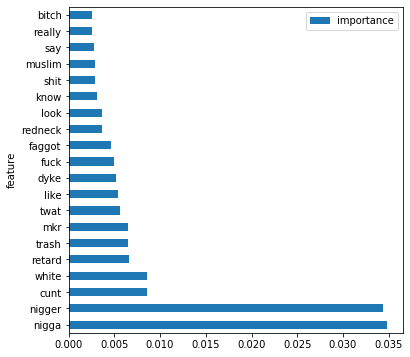

In [44]:
importance_of_features(rf_clf.estimators_[1], vect)

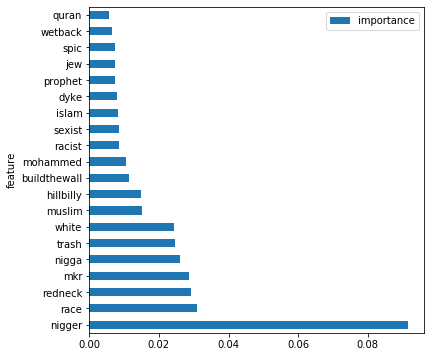

In [45]:
importance_of_features(xgb_clf.estimators_[1], vect)

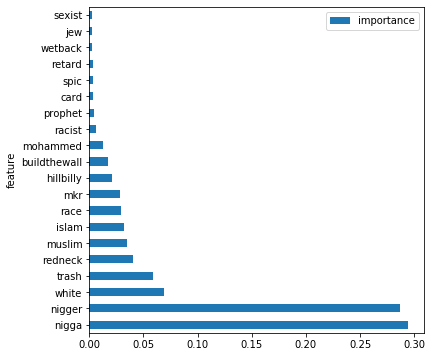

In [46]:
importance_of_features(clf.estimators_[1], vect)